In [19]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
matches = pd.read_csv("../code/matches.csv")

In [3]:
matches['teamX_win'] = matches['SCORE_x'] > matches['SCORE_y']
matches['teamX_win'] = matches['teamX_win'].apply(lambda x : 1 if x else 0)

In [4]:
matches = matches.drop(columns = ['YEAR_x', 
                        'TEAM_x', 
                        'SEED_x', 
                        'SCORE_x', 
                        'gameID', 
                        'TEAMORIGINAL_x', 
                        'Closest Match_x', 
                        'Team Original_x_x', 
                        'Team_x_x', 
                        'Team Original_y_x', 
                        'Team_y_x', 
                        'Year_x', 
                        'YEAR_y', 
                        'TEAM_y',
                        'SEED_y',
                        'SCORE_y',
                        'TEAMORIGINAL_y',
                        'Closest Match_y',
                        'Team Original_x_y',
                         'Team_x_y',
                         'Team Original_y_y',
                         'Team_y_y',
                         'TEAM_lower_y',
                        'TEAM_lower_x',
                        'year_x',
                         'year_y', 
                         'Year_y'])

matches['isUnderdog_x'] = matches['isUnderdog_x'].apply(lambda x : 1 if x else 0)
matches['isUnderdog_y'] = matches['isUnderdog_y'].apply(lambda x : 1 if x else 0)

In [5]:
def strip_and_convert(cell):
    cleaned_cell = str(cell).replace('%', '')  
    return float(cleaned_cell) if cleaned_cell else None
    
matches = matches.map(strip_and_convert)

matches['underdogPerc_interaction_percent_y'] = matches['asUnderdog_winLoss_Win_percent_x_y'] * matches['isUnderdog_y']
matches['underdogPerc_interaction_MOV_y'] = matches['asUnderdog_winLoss_MOV_x_y'] * matches['isUnderdog_y']
matches['underdogPerc_interaction_ATS_y'] = matches['asUnderdog_winLoss_ATS_x_y'] * matches['isUnderdog_y']

matches['underdogPerc_interaction_percent_x'] = matches['asUnderdog_winLoss_Win_percent_x_x'] * matches['isUnderdog_x']
matches['underdogPerc_interaction_MOV_x'] = matches['asUnderdog_winLoss_MOV_x_x'] * matches['isUnderdog_x']
matches['underdogPerc_interaction_ATS_x'] = matches['asUnderdog_winLoss_ATS_x_x'] * matches['isUnderdog_x']

In [58]:
#MODEL 1 -- all predictors

data = matches.dropna()

target = data["teamX_win"]
data = data.drop(columns=["teamX_win"])

train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.25, random_state=999)

col_names = ['afterWin_winLoss_Win_percent_x_x',
 'afterWin_winLoss_MOV_x_x',
 'afterWin_winLoss_ATS_x_x',
 'underdogPerc_interaction_percent_x',
 'underdogPerc_interaction_MOV_x',
 'underdogPerc_interaction_ATS_x',
 'away_winLoss_MOV_x_x',
 'away_winLoss_ATS_x_x',
 'neutralSite_winLoss_Win_percent_x_x',
 'neutralSite_winLoss_MOV_x_x',
 'neutralSite_winLoss_ATS_x_x',
 'overallWinPercentage_Win_percent_x_x',
 'overallWinPercentage_MOV_x_x',
 'overallWinPercentage_ATS_x_x',
 'upperclassmen_x',
 'SRS_x',
 'SOS_x',
 'Tm_x',
 'Opp_x',
 'FG_x',
 'FGA_x',
 'FG%_x',
 '3P_x',
 '3PA_x',
 '3P%_x',
 'FT_x',
 'FTA_x',
 'FT%_x',
 'ORB_x',
 'TRB_x',
 'AST_x',
 'STL_x',
 'BLK_x',
 'TOV_x',
 'PF_x',
 'afterWin_winLoss_Win_percent_x_y',
 'afterWin_winLoss_MOV_x_y',
 'afterWin_winLoss_ATS_x_y',
 'underdogPerc_interaction_percent_y',
 'underdogPerc_interaction_MOV_y',
 'underdogPerc_interaction_ATS_y',
 'away_winLoss_Win_percent_x_y',
 'away_winLoss_MOV_x_y',
 'away_winLoss_ATS_x_y',
 'neutralSite_winLoss_Win_percent_x_y',
 'neutralSite_winLoss_MOV_x_y',
 'neutralSite_winLoss_ATS_x_y',
 'overallWinPercentage_Win_percent_x_y',
 'overallWinPercentage_MOV_x_y',
 'overallWinPercentage_ATS_x_y',
 'upperclassmen_y',
 'SRS_y',
 'SOS_y',
 'Tm_y',
 'Opp_y',
 'FG_y',
 'FGA_y',
 'FG%_y',
 '3P_y',
 '3PA_y',
 '3P%_y',
 'FT_y',
 'FTA_y',
 'FT%_y',
 'ORB_y',
 'TRB_y',
 'AST_y',
 'STL_y',
 'BLK_y',
 'TOV_y',
 'PF_y',
 'seedDiff',
 'isUnderdog_x',
 'isUnderdog_y']

train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.25, random_state=999)

train_data = train_data[col_names]
test_data = test_data[col_names]

scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

lasso_logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

lasso_logreg.fit(train_data_scaled, train_target)

predicted = lasso_logreg.predict(test_data_scaled)

accuracy_1 = accuracy_score(test_target, predicted)
conf_matrix_1 = confusion_matrix(test_target, predicted)
class_report_1 = classification_report(test_target, predicted)

print(f"Accuracy: {accuracy_1:.2f}")
print("Confusion Matrix:")
print(conf_matrix_1)
print("Classification Report:")
print(class_report_1)

Accuracy: 0.75
Confusion Matrix:
[[ 8  4]
 [ 3 13]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.67      0.70        12
         1.0       0.76      0.81      0.79        16

    accuracy                           0.75        28
   macro avg       0.75      0.74      0.74        28
weighted avg       0.75      0.75      0.75        28



In [20]:
coefficients = lasso_logreg.coef_
coeff_1d = coefficients.flatten()

feature_map = pd.DataFrame({
    'Feature': train_data.columns,
    'Coefficient': coeff_1d
})

# Sorting by the absolute value of coefficients
feature_map['abs_coefficient'] = feature_map['Coefficient'].abs()
feature_map_sorted = feature_map.sort_values(by='abs_coefficient', ascending=False)
feature_map_sorted = feature_map_sorted[feature_map_sorted['Coefficient'] != 0]

feature_map_sorted.to_csv('model1_coef.csv', sep=',', index=False)

In [51]:
#renaming

feature_map_sorted['Feature'] = feature_map_sorted['Feature'].replace('afterWin_winLoss_ATS_x_y', 'AWWL_ATS_y')
feature_map_sorted['Feature'] = feature_map_sorted['Feature'].replace('away_winLoss_ATS_x_x', 'AWL_ATS_x')
feature_map_sorted['Feature'] = feature_map_sorted['Feature'].replace('overallWinPercentage_ATS_x_y', 'OWP_ATS_y')
feature_map_sorted['Feature'] = feature_map_sorted['Feature'].replace('underdogPerc_interaction_MOV_y', 'UPI_MOV_y')
feature_map_sorted['Feature'] = feature_map_sorted['Feature'].replace('afterWin_winLoss_Win_percent_x_y', 'AWWL_WP_y')
feature_map_sorted['Feature'] = feature_map_sorted['Feature'].replace('upperclassmen_y', 'upp_y')
feature_map_sorted['Feature'] = feature_map_sorted['Feature'].replace('upperclassmen_x', 'upp_x')
feature_map_sorted['Feature'] = feature_map_sorted['Feature'].replace('neutralSite_winLoss_ATS_x_x', 'NSWL_ATS_x')
feature_map_sorted['Feature'] = feature_map_sorted['Feature'].replace('away_winLoss_ATS_x_y', 'AWL_ATS_y')
feature_map_sorted['Feature'] = feature_map_sorted['Feature'].replace('underdogPerc_interaction_ATS_x', 'UPI_ATS_x')
feature_map_sorted['Feature'] = feature_map_sorted['Feature'].replace('underdogPerc_interaction_percent_x', 'UPI_P_x')
feature_map_sorted['Feature'] = feature_map_sorted['Feature'].replace('neutralSite_winLoss_Win_percent_x_y', 'NSWL_WP_y')
feature_map_sorted['Feature'] = feature_map_sorted['Feature'].replace('neutralSite_winLoss_MOV_x_x', 'NSWL_MOV_x')
feature_map_sorted['Feature'] = feature_map_sorted['Feature'].replace('overallWinPercentage_MOV_x_x', 'OWP_MOV_x')
feature_map_sorted['Feature'] = feature_map_sorted['Feature'].replace('overallWinPercentage_MOV_x_y', 'OWP_MOV_y')
feature_map_sorted['Feature'] = feature_map_sorted['Feature'].replace('underdogPerc_interaction_ATS_y', 'UPI_ATS_y')
feature_map_sorted['Feature'] = feature_map_sorted['Feature'].replace('afterWin_winLoss_ATS_x_x', 'AWWL_ATS_x')
feature_map_sorted['Feature'] = feature_map_sorted['Feature'].replace('away_winLoss_Win_percent_x_y', 'AWL_WP_y')
feature_map_sorted['Feature'] = feature_map_sorted['Feature'].replace('neutralSite_winLoss_Win_percent_x_x', 'NSWL_WP_x')

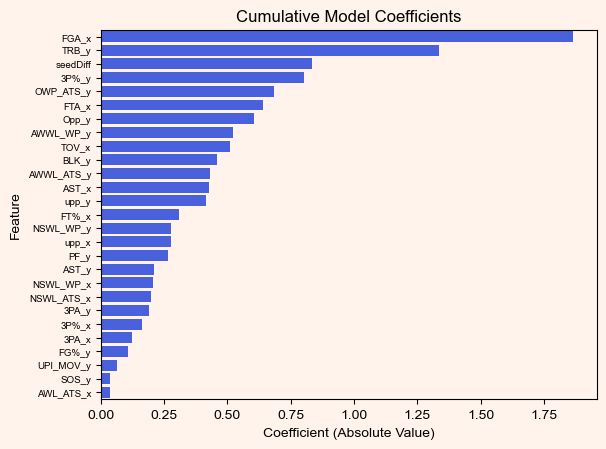

In [52]:
sns.barplot(x='abs_coefficient', y='Feature', data=feature_map_sorted, color="#3051f6")
fig = plt.gcf()  
ax = plt.gca()  # Get the current axes
plt.rcParams.update({'font.family': 'sans-serif', 'font.sans-serif': 'Arial'})
fig.patch.set_facecolor('#fff3ec') 
ax.set_facecolor('#fff3ec') 

plt.title('Cumulative Model Coefficients', fontsize=12)
plt.xlabel('Coefficient (Absolute Value)', fontsize=10)
plt.ylabel('Feature', fontsize=10)

# Set the size of the tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=7)

plt.savefig('featureplot_fullmodel_slidesver.png', format='png')

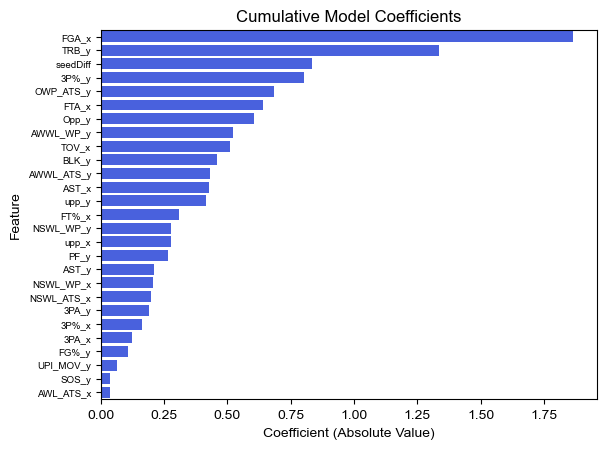

In [53]:
sns.barplot(x='abs_coefficient', y='Feature', data=feature_map_sorted, color="#3051f6")
fig = plt.gcf()  # Get the current figure
ax = plt.gca()  # Get the current axes
plt.rcParams.update({'font.family': 'sans-serif', 'font.sans-serif': 'Arial'})


# Set the title, axis labels, and tick labels with smaller font size
plt.title('Cumulative Model Coefficients', fontsize=12)
plt.xlabel('Coefficient (Absolute Value)', fontsize=10)
plt.ylabel('Feature', fontsize=10)

# Set the size of the tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=7)

plt.savefig('featureplot_fullmodel_reportver.png', format='png')

In [59]:
#MODEL 2 -- just win percentages, no player/team performance

col_names_3 = ['afterWin_winLoss_Win_percent_x_x',
 'afterWin_winLoss_MOV_x_x',
 'afterWin_winLoss_ATS_x_x',
 'underdogPerc_interaction_percent_x',
 'underdogPerc_interaction_MOV_x',
 'underdogPerc_interaction_ATS_x',
 'away_winLoss_MOV_x_x',
 'away_winLoss_ATS_x_x',
 'neutralSite_winLoss_Win_percent_x_x',
 'neutralSite_winLoss_MOV_x_x',
 'neutralSite_winLoss_ATS_x_x',
 'overallWinPercentage_Win_percent_x_x',
 'overallWinPercentage_MOV_x_x',
 'overallWinPercentage_ATS_x_x',
 'afterWin_winLoss_Win_percent_x_y',
 'afterWin_winLoss_MOV_x_y',
 'afterWin_winLoss_ATS_x_y',
 'underdogPerc_interaction_percent_y',
 'underdogPerc_interaction_MOV_y',
 'underdogPerc_interaction_ATS_y',
 'away_winLoss_Win_percent_x_y',
 'away_winLoss_MOV_x_y',
 'away_winLoss_ATS_x_y',
 'neutralSite_winLoss_Win_percent_x_y',
 'neutralSite_winLoss_MOV_x_y',
 'neutralSite_winLoss_ATS_x_y',
 'overallWinPercentage_Win_percent_x_y',
 'overallWinPercentage_MOV_x_y',
 'overallWinPercentage_ATS_x_y',
 'seedDiff',
 'isUnderdog_x',
 'isUnderdog_y']

train_data_3 = train_data[col_names_3]
test_data_3 = test_data[col_names_3]
scaler_3 = StandardScaler()
train_data_scaled_3 = scaler.fit_transform(train_data_3)
test_data_scaled_3 = scaler.transform(test_data_3)

lasso_logreg_3 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

lasso_logreg_3.fit(train_data_scaled_3, train_target)

predicted_3 = lasso_logreg_3.predict(test_data_scaled_3)

# Evaluate the model
accuracy_2 = accuracy_score(test_target, predicted_3)
conf_matrix_2 = confusion_matrix(test_target, predicted_3)
class_report_2 = classification_report(test_target, predicted_3)

print(f"Accuracy: {accuracy_2:.2f}")
print("Confusion Matrix:")
print(conf_matrix_2)
print("Classification Report:")
print(class_report_2)

Accuracy: 0.54
Confusion Matrix:
[[6 6]
 [7 9]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.46      0.50      0.48        12
         1.0       0.60      0.56      0.58        16

    accuracy                           0.54        28
   macro avg       0.53      0.53      0.53        28
weighted avg       0.54      0.54      0.54        28



In [34]:
#Feature plot for second model
coefficients_3 = lasso_logreg_3.coef_
coeff_3 = coefficients_3.flatten()


feature_map_3 = pd.DataFrame({
    'Feature': train_data_3.columns,
    'Coefficient': coeff_3
})

# Sorting by the absolute value of coefficients
feature_map_3['abs_coefficient'] = feature_map_3['Coefficient'].abs()
feature_map_sorted_3 = feature_map_3.sort_values(by='abs_coefficient', ascending=False)
feature_map_sorted_3 = feature_map_sorted_3[feature_map_sorted_3['Coefficient'] != 0]

feature_map_sorted_3.to_csv('model3_coef.csv', sep=',', index=False)

feature_map_sorted_3['Feature'] = feature_map_sorted_3['Feature'].replace('upperclassmen_y', 'upp_y')

In [35]:
#renaming

feature_map_sorted_3['Feature'] = feature_map_sorted_3['Feature'].replace('afterWin_winLoss_ATS_x_y', 'AWWL_ATS_y')
feature_map_sorted_3['Feature'] = feature_map_sorted_3['Feature'].replace('away_winLoss_ATS_x_x', 'AWL_ATS_x')
feature_map_sorted_3['Feature'] = feature_map_sorted_3['Feature'].replace('overallWinPercentage_ATS_x_y', 'OWP_ATS_y')
feature_map_sorted_3['Feature'] = feature_map_sorted_3['Feature'].replace('underdogPerc_interaction_MOV_y', 'UPI_MOV_y')
feature_map_sorted_3['Feature'] = feature_map_sorted_3['Feature'].replace('afterWin_winLoss_Win_percent_x_y', 'AWWL_WP_y')
feature_map_sorted_3['Feature'] = feature_map_sorted_3['Feature'].replace('upperclassmen_y', 'upp_y')
feature_map_sorted_3['Feature'] = feature_map_sorted_3['Feature'].replace('neutralSite_winLoss_ATS_x_x', 'NSWL_ATS_x')
feature_map_sorted_3['Feature'] = feature_map_sorted_3['Feature'].replace('away_winLoss_ATS_x_y', 'AWL_ATS_y')
feature_map_sorted_3['Feature'] = feature_map_sorted_3['Feature'].replace('underdogPerc_interaction_percent_x', 'UPI_P_x')
feature_map_sorted_3['Feature'] = feature_map_sorted_3['Feature'].replace('neutralSite_winLoss_Win_percent_x_y', 'NSWL_WP_y')
feature_map_sorted_3['Feature'] = feature_map_sorted_3['Feature'].replace('neutralSite_winLoss_MOV_x_x', 'NSWL_MOV_x')
feature_map_sorted_3['Feature'] = feature_map_sorted_3['Feature'].replace('overallWinPercentage_MOV_x_x', 'OWP_MOV_x')
feature_map_sorted_3['Feature'] = feature_map_sorted_3['Feature'].replace('overallWinPercentage_MOV_x_y', 'OWP_MOV_y')
feature_map_sorted_3['Feature'] = feature_map_sorted_3['Feature'].replace('underdogPerc_interaction_ATS_y', 'UPI_ATS_y')
feature_map_sorted_3['Feature'] = feature_map_sorted_3['Feature'].replace('afterWin_winLoss_ATS_x_x', 'AWWL_ATS_x')
feature_map_sorted_3['Feature'] = feature_map_sorted_3['Feature'].replace('away_winLoss_Win_percent_x_y', 'AWL_WP_y')

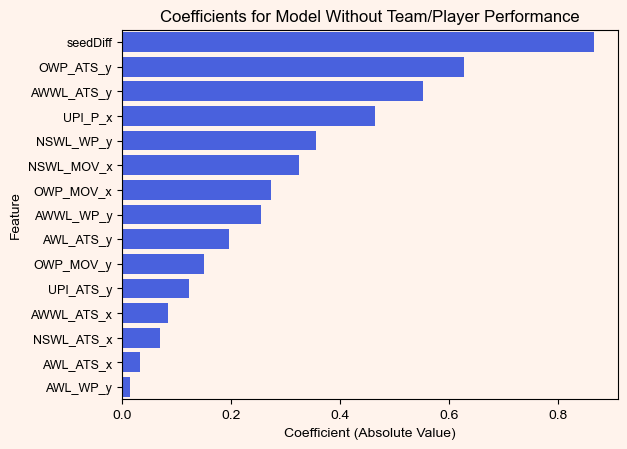

In [36]:
sns.barplot(x='abs_coefficient', y='Feature', data=feature_map_sorted_3, color="#3051f6")
fig = plt.gcf()  
ax = plt.gca()  # Get the current axes
plt.rcParams.update({'font.family': 'sans-serif', 'font.sans-serif': 'Arial'})
fig.patch.set_facecolor('#fff3ec') 
ax.set_facecolor('#fff3ec') 

plt.title('Coefficients for Model Without Team/Player Performance', fontsize=12)
plt.xlabel('Coefficient (Absolute Value)', fontsize=10)
plt.ylabel('Feature', fontsize=10)

# Set the size of the tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=9)

plt.savefig('featureplot_winpercentagemodel_slidesver.png', format='png')

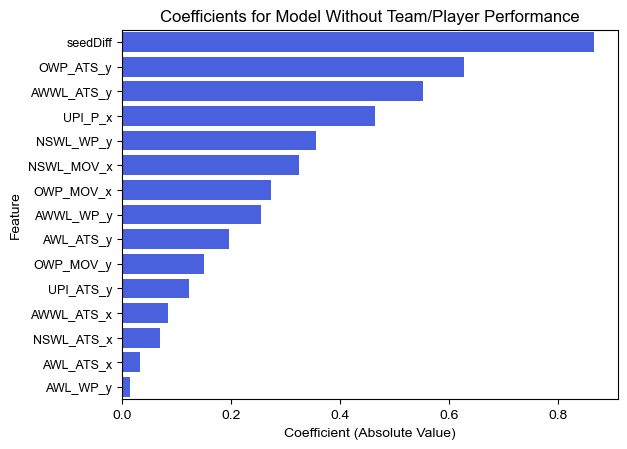

In [37]:
sns.barplot(x='abs_coefficient', y='Feature', data=feature_map_sorted_3, color="#3051f6")
fig = plt.gcf()  
ax = plt.gca()  # Get the current axes
plt.rcParams.update({'font.family': 'sans-serif', 'font.sans-serif': 'Arial'})

plt.title('Coefficients for Model Without Team/Player Performance', fontsize=12)
plt.xlabel('Coefficient (Absolute Value)', fontsize=10)
plt.ylabel('Feature', fontsize=10)

# Set the size of the tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=9)

plt.savefig('featureplot_winpercentagemodel_reportver.png', format='png')

In [60]:
#MODEL 3 -- no win percentages, just player/team performance

col_names_2 = [
 'upperclassmen_x',
 'SRS_x',
 'SOS_x',
 'Tm_x',
 'Opp_x',
 'FG_x',
 'FGA_x',
 'FG%_x',
 '3P_x',
 '3PA_x',
 '3P%_x',
 'FT_x',
 'FTA_x',
 'FT%_x',
 'ORB_x',
 'TRB_x',
 'AST_x',
 'STL_x',
 'BLK_x',
 'TOV_x',
 'PF_x',
 'upperclassmen_y',
 'SRS_y',
 'SOS_y',
 'Tm_y',
 'Opp_y',
 'FG_y',
 'FGA_y',
 'FG%_y',
 '3P_y',
 '3PA_y',
 '3P%_y',
 'FT_y',
 'FTA_y',
 'FT%_y',
 'ORB_y',
 'TRB_y',
 'AST_y',
 'STL_y',
 'BLK_y',
 'TOV_y',
 'PF_y',
 'seedDiff',
 'isUnderdog_x',
 'isUnderdog_y']

train_data_2 = train_data[col_names_2]
test_data_2 = test_data[col_names_2]
scaler_2 = StandardScaler()
train_data_scaled_2 = scaler.fit_transform(train_data_2)
test_data_scaled_2 = scaler.transform(test_data_2)

lasso_logreg_2 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

lasso_logreg_2.fit(train_data_scaled_2, train_target)

predicted_2 = lasso_logreg_2.predict(test_data_scaled_2)

accuracy_3 = accuracy_score(test_target, predicted_2)
conf_matrix_3 = confusion_matrix(test_target, predicted_2)
class_report_3 = classification_report(test_target, predicted_2)

print(f"Accuracy: {accuracy_3:.2f}")
print("Confusion Matrix:")
print(conf_matrix_3)
print("Classification Report:")
print(class_report_3)

print("Model Coefficients:")
print(lasso_logreg_2.coef_)

Accuracy: 0.75
Confusion Matrix:
[[ 8  4]
 [ 3 13]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.67      0.70        12
         1.0       0.76      0.81      0.79        16

    accuracy                           0.75        28
   macro avg       0.75      0.74      0.74        28
weighted avg       0.75      0.75      0.75        28

Model Coefficients:
[[ 1.55652703e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.07420914e+00  0.00000000e+00
   0.00000000e+00 -3.52530670e-01  6.30875330e-02  0.00000000e+00
  -7.00999406e-01  1.90579987e-01  0.00000000e+00  0.00000000e+00
  -4.14632028e-01  0.00000000e+00  0.00000000e+00  3.64609326e-01
   0.00000000e+00 -3.85938841e-01  0.00000000e+00 -2.15709842e-02
   0.00000000e+00 -6.74932049e-01  0.00000000e+00 -1.87439767e-03
   1.42146410e-01  0.00000000e+00 -1.81490054e-01  7.74217756e-01
   0.00000000e+00  0.00000000e+00 -8.88432189e-02 

In [39]:
#Feature map for third model
coefficients_2 = lasso_logreg_2.coef_
coeff_2 = coefficients_2.flatten()


feature_map_2 = pd.DataFrame({
    'Feature': train_data_2.columns,
    'Coefficient': coeff_2
})

# Sorting by the absolute value of coefficients
feature_map_2['abs_coefficient'] = feature_map_2['Coefficient'].abs()
feature_map_sorted_2 = feature_map_2.sort_values(by='abs_coefficient', ascending=False)
feature_map_sorted_2 = feature_map_sorted_2[feature_map_sorted_2['Coefficient'] != 0]

feature_map_sorted_2.to_csv('model2_coef.csv', sep=',', index=False)

feature_map_sorted['Feature'] = feature_map_sorted['Feature'].replace('upperclassmen_y', 'upp_y')

In [45]:
feature_map_sorted_2['Feature'] = feature_map_sorted_2['Feature'].replace('upperclassmen_y', 'upp_y')
feature_map_sorted_2['Feature'] = feature_map_sorted_2['Feature'].replace('isUnderdog_x', 'U_x')
feature_map_sorted_2['Feature'] = feature_map_sorted_2['Feature'].replace('isUnderdog_y', 'U_y')
feature_map_sorted_2['Feature'] = feature_map_sorted_2['Feature'].replace('upperclassmen_x', 'upp_x')


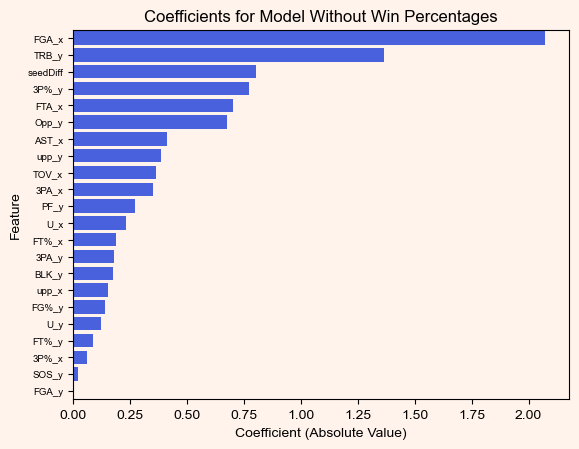

In [46]:
sns.barplot(x='abs_coefficient', y='Feature', data=feature_map_sorted_2, color="#3051f6")
fig = plt.gcf()  
ax = plt.gca()  # Get the current axes
plt.rcParams.update({'font.family': 'sans-serif', 'font.sans-serif': 'Arial'})
fig.patch.set_facecolor('#fff3ec') 
ax.set_facecolor('#fff3ec') 

plt.title('Coefficients for Model Without Win Percentages', fontsize=12)
plt.xlabel('Coefficient (Absolute Value)', fontsize=10)
plt.ylabel('Feature', fontsize=10)

# Set the size of the tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=7)

plt.savefig('featureplot_teamperformancemodel_slidesver.png', format='png')

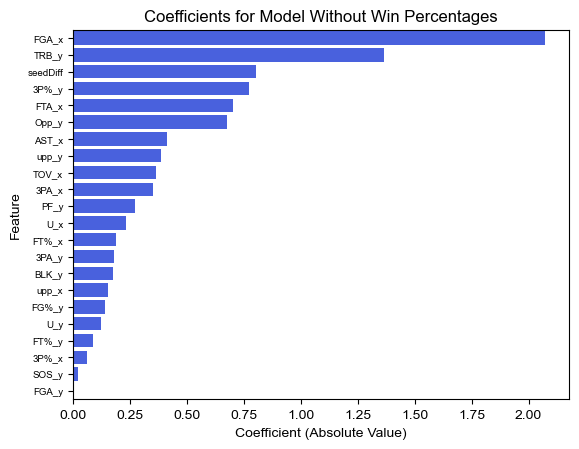

In [47]:
sns.barplot(x='abs_coefficient', y='Feature', data=feature_map_sorted_2, color="#3051f6")
fig = plt.gcf()  
ax = plt.gca()  # Get the current axes
plt.rcParams.update({'font.family': 'sans-serif', 'font.sans-serif': 'Arial'})

plt.title('Coefficients for Model Without Win Percentages', fontsize=12)
plt.xlabel('Coefficient (Absolute Value)', fontsize=10)
plt.ylabel('Feature', fontsize=10)

# Set the size of the tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=7)

plt.savefig('featureplot_teamperformancemodel_reportver.png', format='png')